## 2 Data

(a)


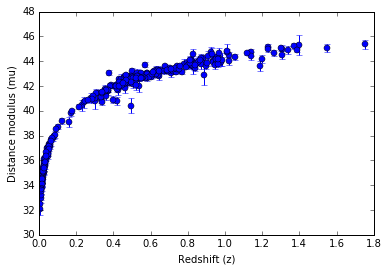

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z1, mu1, sigma1 = np.loadtxt('SN.dat', usecols=(1,2,3), unpack=True)
print "(a)"
plt.errorbar(z1, mu1, yerr=sigma1, fmt='o')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance modulus (mu)")
plt.show()

    The plot of my Hubble diagram looks very similar to Fig. 6 from Riess et al. The shape is the same with very similar outliers too.

(b)


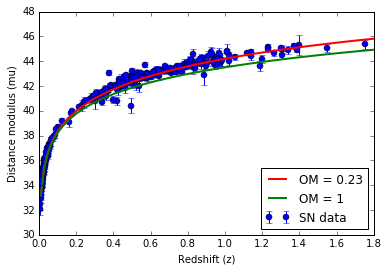

In [9]:
from scipy.integrate import quad
from math import log10

def Ez(z, h, OM):
    Ez = np.sqrt(OM*(1+z)**(3.0) + (1-OM))
    return Ez

def integrand(z, h, OM):
    return (1/Ez(z, h, OM))

def DL(z, h, OM):
    DL = quad(integrand,0,z, args=(h,OM))
    return (1.0+z)*(3000.0)*DL[0]

def mu(z, h, OM):
    mu = 25.0 - 5.0*log10(h) + 5.0*log10(DL(z, h, OM))
    return mu

N = 100
z = np.linspace(0.01,1.8,N)

MU = []
for i in range(N):
    MU.append(mu(z[i], 0.7, 0.23))
    
MU2 = []
for i in range(N):
    MU2.append(mu(z[i], 0.7, 1))
    
print "(b)"
    
plt.errorbar(z1, mu1, yerr=sigma1, fmt='bo', label = 'SN data')    
plt.plot(z, MU, 'r', linewidth = 2, label = 'OM = 0.23')
plt.plot(z, MU2, 'g', linewidth = 2, label = 'OM = 1')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance modulus (mu)")
plt.legend(loc = 'lower right')
plt.show()

    Yes, it is very easy to see the difference as Omega_m = 1 curve slightly more downwards. They both fit the data, but Omega_m = 0.23 is a much better fit for the data.

## 3 Estimating parameters

    (a)
    To get a best fit model, I would proceed by trying to minimize the chi-squared function in order to get the lowest value possible. With the lowest chi-squared, it gives the best data fit. 

In [3]:
def chi2(params, z_data, mu_data, sigma_data):
    h, OM = params
    MU3 = []
    for i in range(len(z_data)):
        MU3.append(mu(z_data[i], h, OM))
    
    chi2 = []
    for j in range(len(MU3)):
        chi2.append(((mu_data[j] - MU3[j])**2)/((sigma_data[j])**2))
    
    return np.sum(chi2)

In [12]:
from scipy.optimize import fmin

print "(b)"

p0 = ([0.7, 0.23])
opt = fmin(chi2, p0, args=(z1, mu1, sigma1))

print opt

(b)
Optimization terminated successfully.
         Current function value: 393.490323
         Iterations: 33
         Function evaluations: 61
[ 0.63051212  0.31830284]


(c)


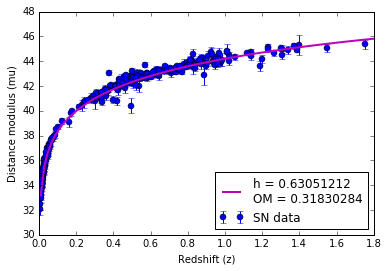

In [13]:
N = 100
z = np.linspace(0.01,1.8,N)

MU4 = []
for i in range(N):
    MU4.append(mu(z[i], opt[0], opt[1]))

print "(c)"    
plt.errorbar(z1, mu1, yerr=sigma1, fmt='o', label = 'SN data')    
plt.plot(z, MU, 'm', linewidth = 2, label = 'h = 0.63051212\nOM = 0.31830284')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance modulus (mu)")
plt.legend(loc = 'lower right')
plt.show()

    The best fit model is given by an Omega_m = 0.318 and a h = 0.63. My chi-squared is 393.5 with a reduced chi-squared of 393.5/(292-2) = 1.36 that is a decent fit. To call a fit acceptable, you would expect chi-squared values of 291-440 to give a reduced chi-squared of 1-1.5. Once the reduced chi-squared is close to 1, it is an acceptable fit.

## 4 MCMC

    (a)
    We are now searching for the maximum of the likelihood, not the minimum, since that gives the highest probability.

(b)


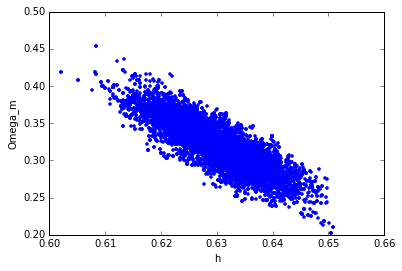

In [14]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


def lnprob(params, z_data, mu_data, sigma_data):
    h, OM = params
    if OM < 0 or OM > 1:
        return -1e20
    if h < 0 or h > 1:
        return -1e20
    return -0.5*chi2(params, z_data, mu_data, sigma_data)

ndim = 2

nwalkers = 10
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(z1, mu1, sigma1))

pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()
sampler.run_mcmc(pos, 1000, rstate0=state)
print "(b)"
plt.plot(sampler.flatchain[:,0],sampler.flatchain[:,1], '.')
plt.xlabel("h")
plt.ylabel("Omega_m")

plt.show()

    The points do not include Omega_m = 1 as it is all gathered around Omega_m = 0.32

    (c)
    Using MCMC, you get the additional information about the errors on Omega_m and h values by looking at the points that are within 70% of the minimized value. Minimization only gives one value with no error. 

    (d)
    My current cosmological model is Omega_m = 0.32 +/- 0.03, Omega_lamda = 0.68 +/- 0.03, and h = 0.631 +/- 0.005. Yes I'm ready to win a Nobel prize.